<a href="https://colab.research.google.com/github/sebinefrancis/Deep-Learning-Exercise/blob/Dog_vs_Cat_CNN/Dog_vs_Cat_CNN/Dogs%20vs.%20Cats%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !!! If you change runtime instance in between, you will have to run everything from the beginning, all temp files which are not in GDrive will be lost
# to keep colab gpu instance connected, run this js in browser console
"""
function ClickConnect(){
            console.log('Working');
            document.querySelector('colab-connect-button').shadowRoot.getElementById('connect').click()
}
setInterval(ClickConnect,60000)
"""

#GITHUB COMMIT BRANCH AND PATH
# Dog_vs_Cat_CNN/Dogs vs. Cats CNN.ipynb

"\nfunction ClickConnect(){\n            console.log('Working');\n            document.querySelector('colab-connect-button').shadowRoot.getElementById('connect').click()\n}\nsetInterval(ClickConnect,60000)\n"

In [0]:
#set up for kaggle api in colab. Copy each set and run. or run cells below
#! pip install -q kaggle

#from google.colab import files
#files.upload()
#! mkdir ~/.kaggle  #created at '../root/'
# ! cp kaggle.json ~/.kaggle/
#!cp '/content/drive/My Drive/Colab Notebooks/ColabFiles/kaggle.json' ~/.kaggle/ #to copy from drive
# ! chmod 600 ~/.kaggle/kaggle.json
# ! pip install --upgrade --force-reinstall --no-deps kaggle
# ! kaggle datasets list #test api
#! ls
# import os
# os.listdir('../root/.kaggle') #this is where .kaggle folder is located. You can't see hidden folders in file browser

#first go to this kaggle competition page>rules>accept terms. Then only download works
#!kaggle competitions download -c dogs-vs-cats #download dataset
#!unzip dogs-vs-cats.zip -d kaggle_original_data/
#!unzip kaggle_original_data/train.zip -d kaggle_original_data/ #already train is zipped in a folder. 
# Don't browse this folder in left file browser, webbrowser will hang, because of too many files


# !rm -r kaggle_original_data/train/ delete files recursively !!!!! if needed !!!!

In [3]:
#installs latest kaggle api, default api will download train.zip and test.zip separately. But latest download single zip file 'dogs-vs-cats.zip'
#!pip install --upgrade --force-reinstall --no-deps kaggle 
import os
if  not os.path.exists('../root/.kaggle/kaggle.json'):
    !mkdir ~/.kaggle  #created at '../root/'
    !cp '/content/drive/My Drive/Colab Notebooks/ColabFiles/kaggle.json' ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats #download dataset

#if latest kaggle api is used
# !unzip dogs-vs-cats.zip -d kaggle_original_data/
# !unzip kaggle_original_data/train.zip -d kaggle_original_data/ #already train is zipped in a folder.

#if default kaggle api is used, use following code to unzip
!unzip -q train.zip -d kaggle_original_data/

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.1MB/s]
 98% 265M/271M [00:01<00:00, 125MB/s]
100% 271M/271M [00:02<00:00, 140MB/s]
 99% 539M/543M [00:03<00:00, 159MB/s]
100% 543M/543M [00:03<00:00, 148MB/s]


**Prepare our smaller dataset**

In [0]:
import os, shutil
#Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'kaggle_original_data/train'

if os.path.exists(original_dataset_dir): #only if data set is downloaded

    # Directory where you’ll store your smaller dataset
    base_dir = 'cats_and_dogs_small'
    os.mkdir(base_dir)

    #Directories for the training,validation, and test splits
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    #Directory with training cat pictures
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)

    #Directory with training dog pictures
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)

    #Directory with validation cat pictures
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)

    #Directory with validation dog pictures
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)

    #Directory with test cat pictures
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)

    #Directory with test dog pictures
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)

    #Copies the first 1,000 cat images to train_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 cat images to validation_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 cat images to test_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the first 1,000 dog images to train_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 dog images to validation_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 dog images to test_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

As a sanity check, let’s count how many pictures are in each training split (train/validation/
test):

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Instantiating a small convnet for dogs vs. cats classification**

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

**Data preprocessing**

Using ImageDataGenerator to read images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150), #Resizes all images to 150 × 150
                    batch_size=20,
                    class_mode='binary') # Because you use binary_crossentropy loss, you need binary labels.
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Understanding Python generators**

A Python generator is an object that acts as an iterator: it’s an object you can use
with the for … in operator. Generators are built using the yield operator.

Here is an example of a generator that yields integers:

In [8]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
for item in generator():
    print(item)
    if item > 4:
      break

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

1
2
3
4
5
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Fitting the model using a batch generator**

In [9]:
history = model.fit_generator(
                  train_generator,
                  steps_per_epoch=100,
                  epochs=30,
                  validation_data=validation_generator,
                  validation_steps=50)
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6911 - acc: 0.5240 - val_loss: 0.6786 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6665 - acc: 0.5840 - val_loss: 0.6992 - val_acc: 0.5620
Epoch 3/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6188 - acc: 0.6585 - val_loss: 0.6427 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5763 - acc: 0.6970 - val_loss: 0.7217 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5382 - acc: 0.7285 - val_loss: 0.5930 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5048 - acc: 0.7640 - val_loss: 0.4293 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 11s 106ms/step - loss: 0.4743 - acc: 0.7775 - val_loss: 0.5655 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

**Displaying curves of loss and accuracy during training**

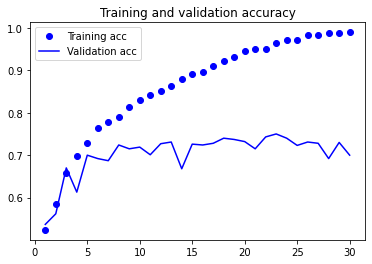

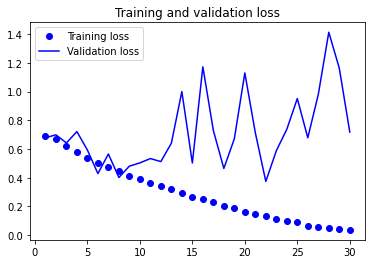

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Accuracy = 70-72%

**Using data augmentation**

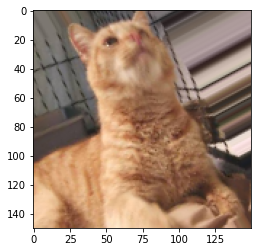

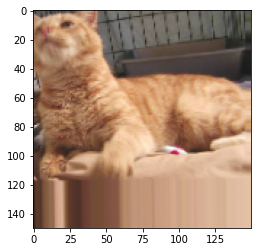

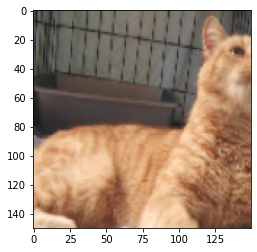

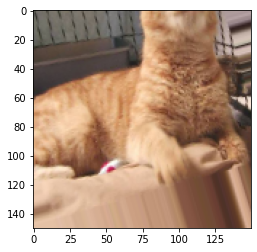

In [11]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
from keras.preprocessing import image #Module with imagepreprocessing utilities
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) #Reads the image and resizes it
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

**Defining a new convnet that includes dropout**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

**Training the convnet using data-augmentation generators**

In [13]:
train_datagen = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True) #fill_mode='nearest' is the default

test_datagen = ImageDataGenerator(rescale=1./255) #Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150), #Resizes all images to 150 × 150
                    batch_size=32, #changed 32 in text to 20 same as previous 
                    class_mode='binary') #Because you use binary_crossentropy loss, you need binary labels.

validation_generator = test_datagen.flow_from_directory(
                            validation_dir,
                            target_size=(150, 150),
                            batch_size=32, #changed 32 in text to 20 same as previous 
                            class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=100, #changed 100 in text to 30 same as previous 
                    validation_data=validation_generator,
                    validation_steps=50)

model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_2.h5') #save the model

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 35s 345ms/step - loss: 0.6915 - acc: 0.5237 - val_loss: 0.7187 - val_acc: 0.5114
Epoch 2/100
100/100 [==============================] - 32s 315ms/step - loss: 0.6777 - acc: 0.5832 - val_loss: 0.7089 - val_acc: 0.5116
Epoch 3/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6636 - acc: 0.6023 - val_loss: 0.5914 - val_acc: 0.5780
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6508 - acc: 0.6197 - val_loss: 0.6288 - val_acc: 0.6366
Epoch 5/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6338 - acc: 0.6370 - val_loss: 0.5382 - val_acc: 0.6650
Epoch 6/100
100/100 [==============================] - 33s 331ms/step - loss: 0.6220 - acc: 0.6506 - val_loss: 0.7140 - val_acc: 0.6205
Epoch 7/100
100/100 [==============================] - 32s 315ms/step - loss: 0.6084 - acc: 0.6674 -

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_2.h5') #save the model

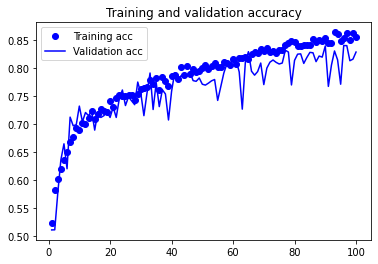

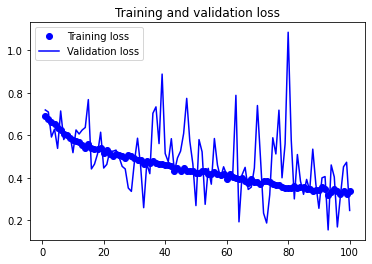

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After Augmentation + Dropout Accuracy = 82%

**Using a pretrained convnet**
1. For Feature Extraction and
2. For Fine Tuning

**1. Feature Extraction**

Instantiating the VGG16 convolutional base

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

At this point, there are two ways you could proceed:

1. Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier similar to those you saw in part 1 of this book. This solution
is fast and cheap to run, because it only requires running the convolutional
base once for every input image, and the convolutional base is by far the most
expensive part of the pipeline. But for the same reason, this technique won’t
allow you to use data augmentation.

2. Extending the model you have (conv_base) by adding Dense layers on top, and
running the whole thing end to end on the input data. This will allow you to use
data augmentation, because every input image goes through the convolutional
base every time it’s seen by the model. But for the same reason, this technique is
far more expensive than the first.

**1. FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION**

In [18]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                        directory,
                        target_size=(150, 150),
                        batch_size=batch_size,
                        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #generates prediction output of conv_base
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
to a densely connected classifier, so first you must **flatten** them to (samples, 8192):

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

**Defining and training the densely connected classifier**

In [20]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512)) #note instead of input_shape=(4*4*512,)
model.add(layers.Dropout(0.5)) #added dropuout to fight overfitting
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 433us/step - loss: 0.5858 - acc: 0.6840 - val_loss: 0.4334 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.4297 - acc: 0.8000 - val_loss: 0.3524 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 1s 374us/step - loss: 0.3593 - acc: 0.8420 - val_loss: 0.3231 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 1s 382us/step - loss: 0.3192 - acc: 0.8605 - val_loss: 0.2928 - val_acc: 0.8920
Epoch 5/30
2000/2000 [==============================] - 1s 380us/step - loss: 0.2919 - acc: 0.8775 - val_loss: 0.2921 - val_acc: 0.8780
Epoch 6/30
2000/2000 [==============================] - 1s 378us/step - loss: 0.2654 - acc: 0.8990 - val_loss: 0.2667 - val_acc: 0.9000
Epoch 7/30
2000/2000 [==============================] - 1s 378us/step - loss: 0.2525 - acc: 0.8965 - val_loss: 0.2686 - val_acc: 0.8960


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_fast_extraction.h5') #save the model

**Plotting the results**

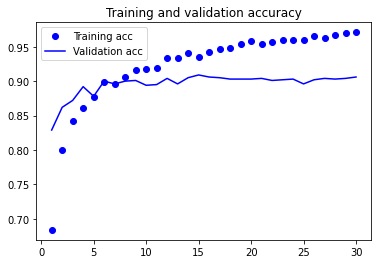

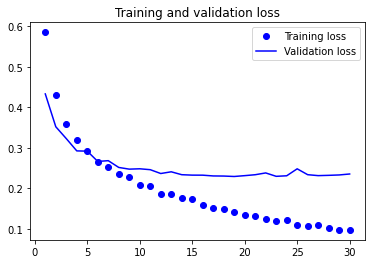

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

validation accuracy of about 90%—much better than you achieved in the
previous section with the small model trained from scratch. But the plots also indicate
that you’re overfitting almost from the start—despite using dropout with a fairly large
rate. That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets.

**2. FEATURE EXTRACTION WITH DATA AUGMENTATION : SLOW, EXPENSIVE**

Adding a densely connected classifier on top of the convolutional base

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base) #Adding the conv base to model just like a layer
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) #Try with dropout if you reach 96% otherwise you are still at 90% right??
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**Freezing the conv base**

In [44]:
print('Number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False #Freezes the convolution base

print('Number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 30
Number of trainable weights after freezing the conv base: 4


Training the model end to end with a frozen convolutional base

In [45]:
#ALWAYS RUN FREEZING STEP BEFORE RUNNING THIS ONE
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#Data augmentation
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) #No augmentation for validation data!!!

train_generator = train_datagen.flow_from_directory(
                      train_dir,
                      target_size=(150, 150),
                      batch_size=20,
                      class_mode='binary') #Because you use binary_crossentropy loss, you need binary labels.

validation_generator = test_datagen.flow_from_directory(
                      validation_dir,
                      target_size=(150, 150),
                      batch_size=20,
                      class_mode='binary')

#MUST recompile model if changes made to freezing
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
                      train_generator,
                      steps_per_epoch=100,
                      epochs=30, #30 was initial value
                      validation_data=validation_generator,
                      validation_steps=50)
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_extraction_augmented.h5') #save the model

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 29s 286ms/step - loss: 0.6209 - acc: 0.6720 - val_loss: 0.3909 - val_acc: 0.7910
Epoch 2/30
100/100 [==============================] - 26s 261ms/step - loss: 0.4899 - acc: 0.7735 - val_loss: 0.3745 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 26s 263ms/step - loss: 0.4304 - acc: 0.8060 - val_loss: 0.3691 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.3929 - acc: 0.8295 - val_loss: 0.3244 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 27s 268ms/step - loss: 0.3987 - acc: 0.8185 - val_loss: 0.2064 - val_acc: 0.8700
Epoch 6/30
100/100 [==============================] - 26s 259ms/step - loss: 0.3762 - acc: 0.8295 - val_loss: 0.2149 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 25s 254ms/step - loss: 0.3597 - acc: 0.8410 - val_lo

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_extraction_augmented.h5') #save the model

**Plot Results**

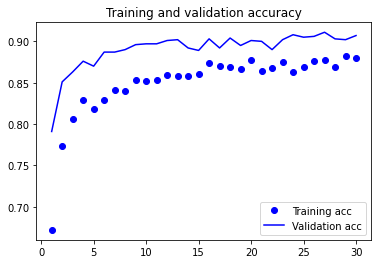

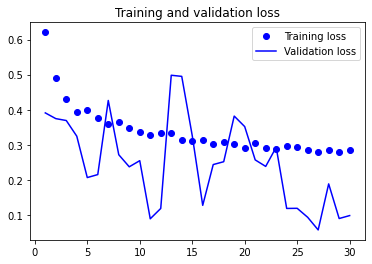

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Accuracy after using pretarained convnet with data augmentation : 96%

**2. Fine Tuning**

In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Freeze individual layers of conv_base

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
              train_generator,
              steps_per_epoch=100,
              epochs=100,
              validation_data=validation_generator,
              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 296ms/step - loss: 0.3058 - acc: 0.8630 - val_loss: 0.2014 - val_acc: 0.9120
Epoch 2/100
100/100 [==============================] - 28s 276ms/step - loss: 0.2534 - acc: 0.8865 - val_loss: 0.0972 - val_acc: 0.9190
Epoch 3/100
100/100 [==============================] - 28s 277ms/step - loss: 0.2408 - acc: 0.8985 - val_loss: 0.0873 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 28s 276ms/step - loss: 0.2261 - acc: 0.9020 - val_loss: 0.0498 - val_acc: 0.9200
Epoch 5/100
100/100 [==============================] - 27s 268ms/step - loss: 0.2112 - acc: 0.9105 - val_loss: 0.4613 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 27s 268ms/step - loss: 0.1887 - acc: 0.9210 - val_loss: 0.3187 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 27s 275ms/step - loss: 0.1880 - acc: 0.9250 - val_loss: 0.2400 - val_acc: 0.9300
Epoch 8/100
100/100 [===========================

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_extraction_augmented_fine_tuned.h5') #save the model

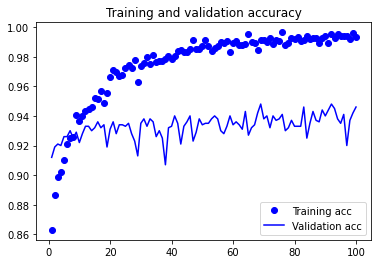

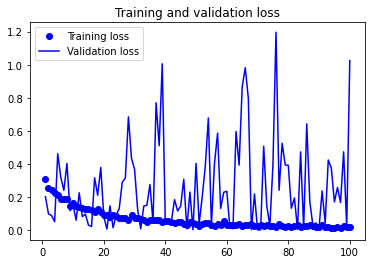

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Make the curves smooth by exponential moving average

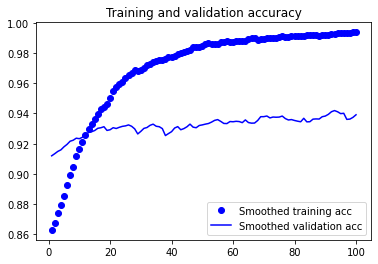

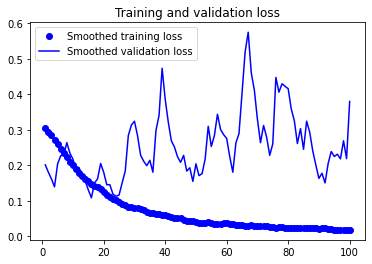

In [53]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Visualizing what convnets learn**

**1. Visualizing intermediate activations**

In [77]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

Preprocessing a single image

In [57]:
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


Displaying the test picture

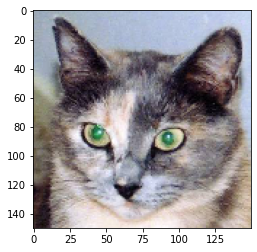

In [58]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

Instantiating a model from an input tensor and a list of output tensors

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Running the model in predict mode

In [60]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Visualizing the fourth channel

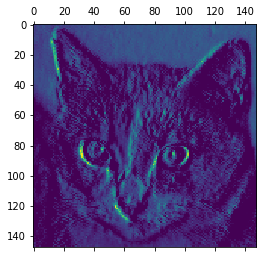

In [61]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Visualizing the seventh channel

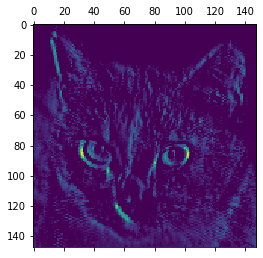

In [62]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

Visualizing every channel in every intermediate activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


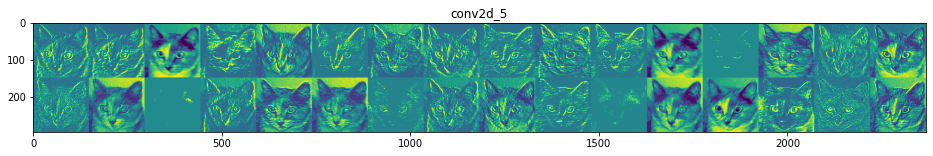

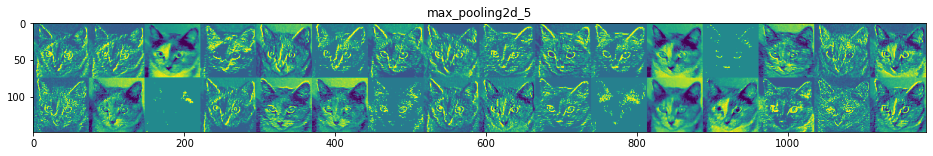

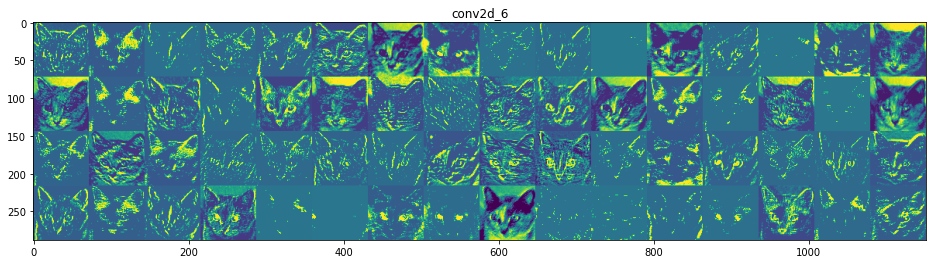

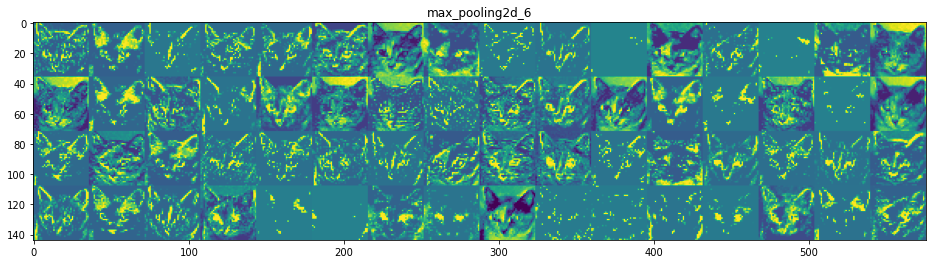

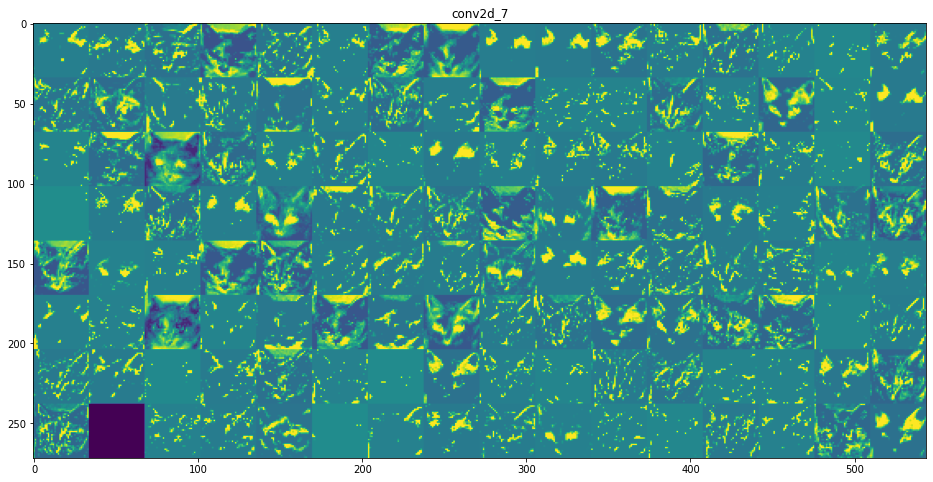

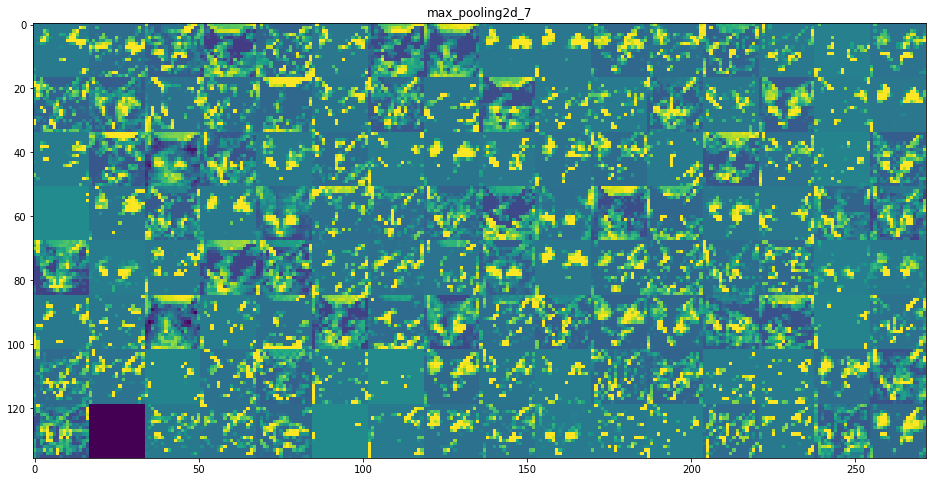

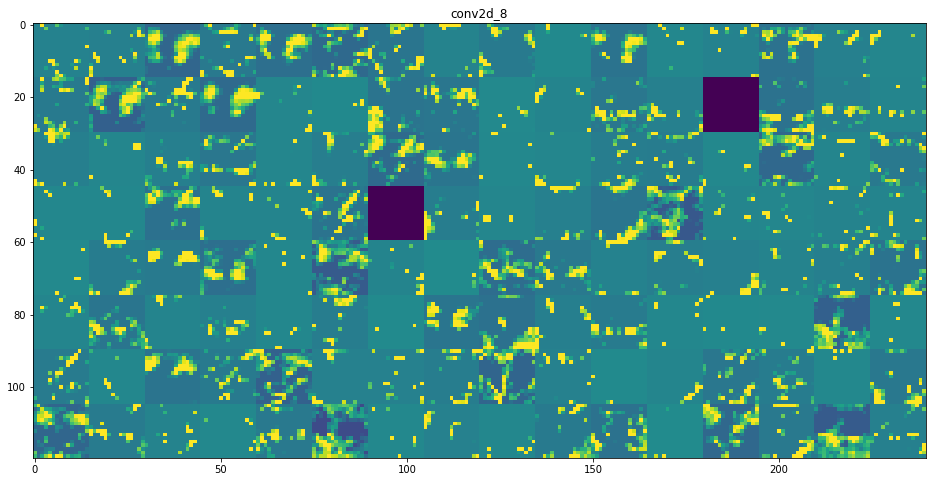

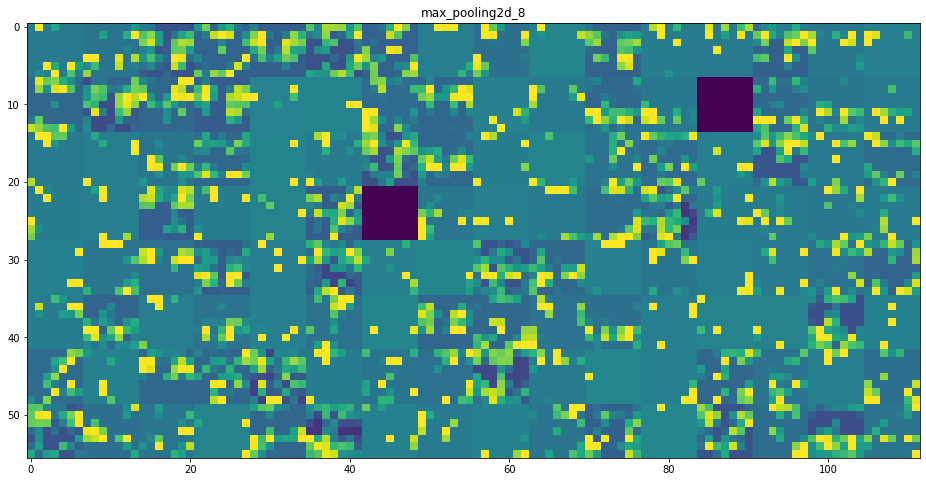

In [63]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**2. Visualizing convnet filters**

Defining the loss tensor for filter visualization

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [0]:
model.summary()

Obtaining the gradient of the loss with regard to the input

In [0]:
grads = K.gradients(loss, model.input)[0]

Gradient-normalization trick

In [0]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

Fetching Numpy output values given Numpy input values

In [0]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

Loss maximization via stochastic gradient descent

In [0]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

Utility function to convert a tensor into a valid image

In [0]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Function to generate filter visualizations

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

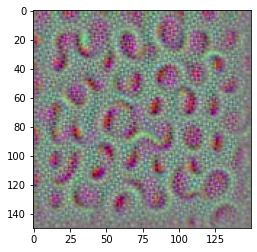

In [119]:
plt.imshow(generate_pattern('block4_conv1', 0))

Generating a grid of all filter response patterns in a layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


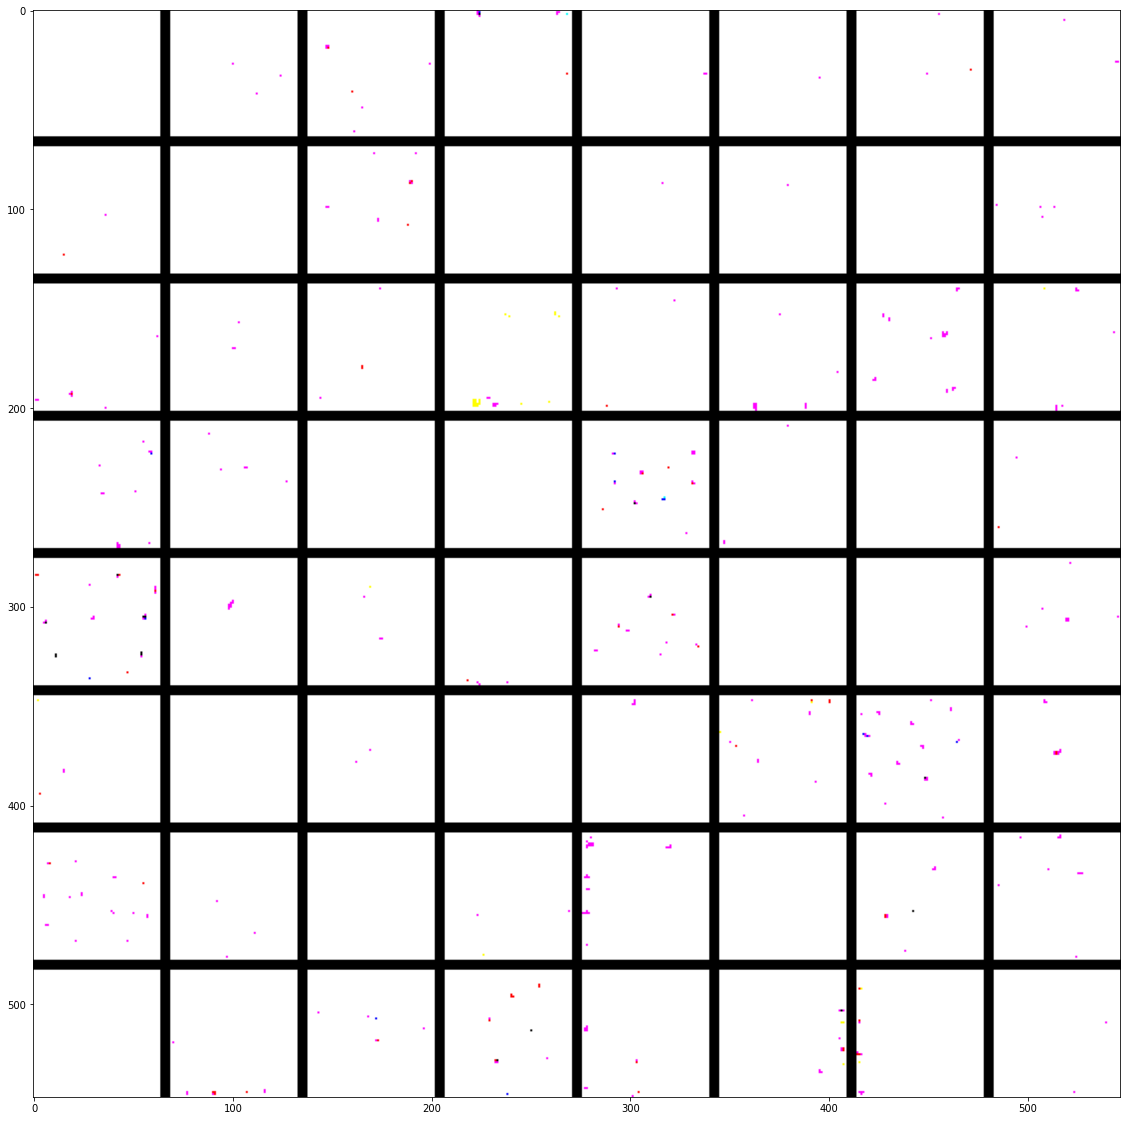

In [123]:
layer_name = 'block4_conv2'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,vertical_start: vertical_end,:] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.savefig('/content/drive/My Drive/Colab Notebooks/ColabFiles/block4_conv2.png', bbox_inches='tight')

**3. Visualizing heatmaps of class activation**

Loading the VGG16 network with pretrained weights

In [91]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet') #Note that you include the densely connected classifier on top; in all previous cases, you discarded it.

553467904/553467096 [==============================] - 8s 0us/step


Preprocessing an input image for VGG16

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/content/drive/My Drive/Colab Notebooks/ColabFiles/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [93]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.7541504), ('n01871265', 'tusker', 0.21682568), ('n02504013', 'Indian_elephant', 0.025588287)]


Setting up the Grad-CAM algorithm

In [0]:
african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function( [model.input],
                      [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

Heatmap post-processing

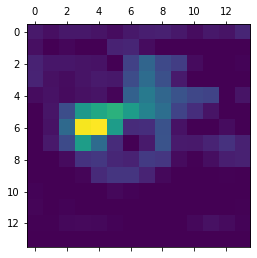

In [96]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

Superimposing the heatmap with the original picture

In [97]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('/content/drive/My Drive/Colab Notebooks/ColabFiles/elephant_cam.jpg', superimposed_img)

True

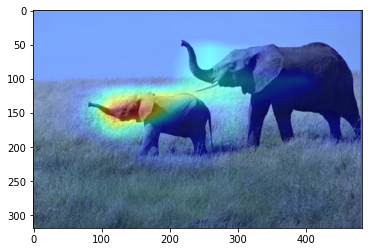

In [98]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/ColabFiles/elephant_cam.jpg')
imgplot = plt.imshow(img)
plt.show()